<a href="https://colab.research.google.com/github/sarahmuh/MASAR/blob/main/new_york_houseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# House price prediction Analysis

In [2]:
#import the needed packages
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read the data
df = pd.read_csv("/kaggle/input/new-york-housing-market/NY-House-Dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/new-york-housing-market/NY-House-Dataset.csv'

In [ ]:
# let's explore the data
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
#checking shape of datasets
df.shape

(4801, 17)

In [ ]:
#checking missing / null values
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

<div style="text-align:center; background-color:black; color:yellow; font-size:35px; padding:20px;">
    Exploratory Data Analysis (EDA)
</div>


In [ ]:

# Summary statistics for numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
PRICE,4801.0,2.356940e+06,3.135525e+07,2494.000000,499000.000000,825000.000000,1.495000e+06,2.147484e+09
BEDS,4801.0,3.356801e+00,2.602315e+00,1.000000,2.000000,3.000000,4.000000e+00,5.000000e+01
BATH,4801.0,2.373861e+00,1.946962e+00,0.000000,1.000000,2.000000,3.000000e+00,5.000000e+01
PROPERTYSQFT,4801.0,2.184208e+03,2.377141e+03,230.000000,1200.000000,2184.207862,2.184208e+03,6.553500e+04
LATITUDE,4801.0,4.071423e+01,8.767557e-02,40.499546,40.639375,40.726749,4.077192e+01,4.091273e+01
LONGITUDE,4801.0,-7.394160e+01,1.010825e-01,-74.253033,-73.987143,-73.949189,-7.387064e+01,-7.370245e+01


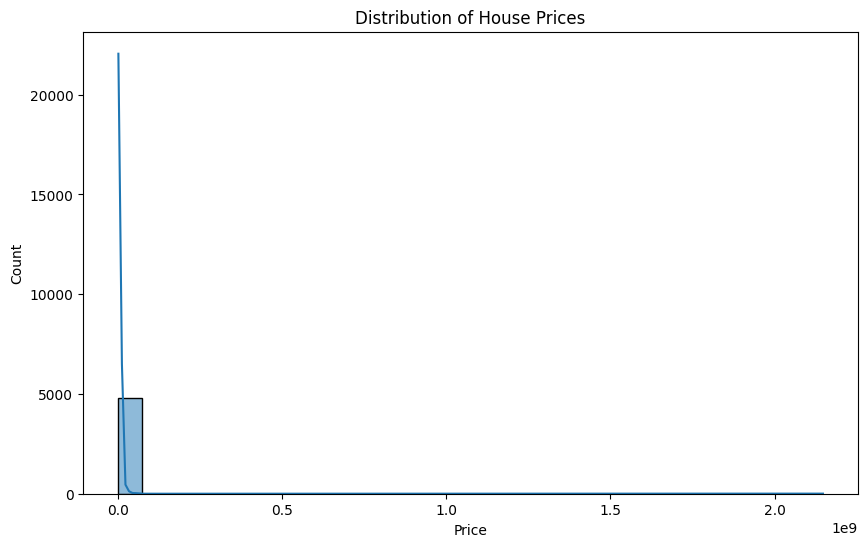

In [ ]:
# Distribution of house prices (((((((((By ploting Graph of Price we believe that there is huge outlier present in Price )))))))))
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

<div style="text-align:center; background-color:black; color:cyan; font-size:25px; padding:20px;">
    Exploratory Data Analysis (EDA)
</div>


In [ ]:

# Visualize the distribution of house prices
from scipy import stats

# Calculate z-scores for the 'PRICE' column
z_scores = stats.zscore(df['PRICE'])

# Define a threshold for z-scores (e.g., 3)
threshold = 3

# Identify outliers based on the threshold
outliers = df['PRICE'][np.abs(z_scores) > threshold]

# Display the outliers
print("Outliers in the PRICE column:")
print(outliers)


Outliers in the PRICE column:
1       195000000
304    2147483647
Name: PRICE, dtype: int64


In [ ]:
# Calculate z-scores for the 'PRICE' column
z_scores = stats.zscore(df['PRICE'])

# Define a threshold for z-scores (e.g., 3)
threshold = 3

# Identify and remove outliers based on the threshold
df_no_outliers = df[np.abs(z_scores) <= threshold]

# Display the shape of the original and modified DataFrames
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (4801, 17)
DataFrame shape after removing outliers: (4799, 17)


In [ ]:
df_no_outliers

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


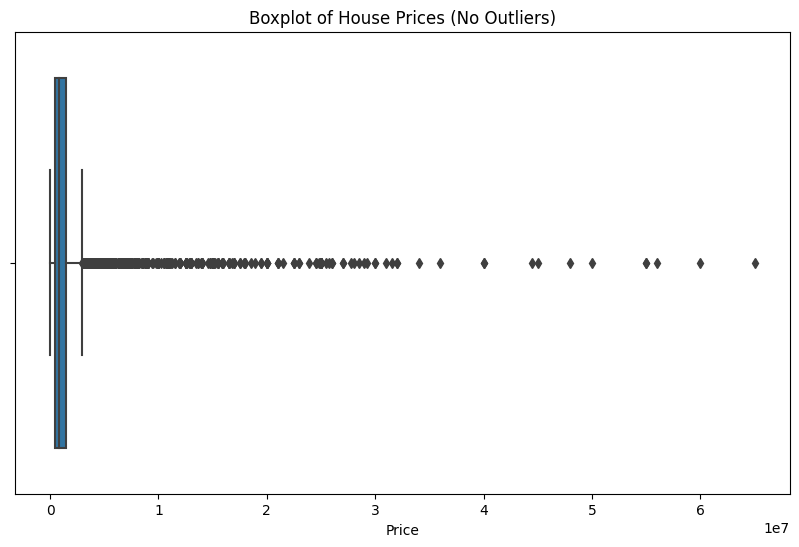

In [ ]:
# 'df_no_outliers' is the DataFrame without outliers ((((((NOW there is less noise))))))
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['PRICE'])
plt.title('Boxplot of House Prices (No Outliers)')
plt.xlabel('Price')
plt.show()

In [ ]:
#'df_no_outliers' is the DataFrame without outliers
df_new = df_no_outliers.copy()


<div style="text-align:center; background-color:royalblue; color:wheat; font-size:25px; padding:20px;">
    <strong>Analysis 1: Price Distribution</strong>
</div>


### Visualize the distribution of house prices to understand the overall price range.

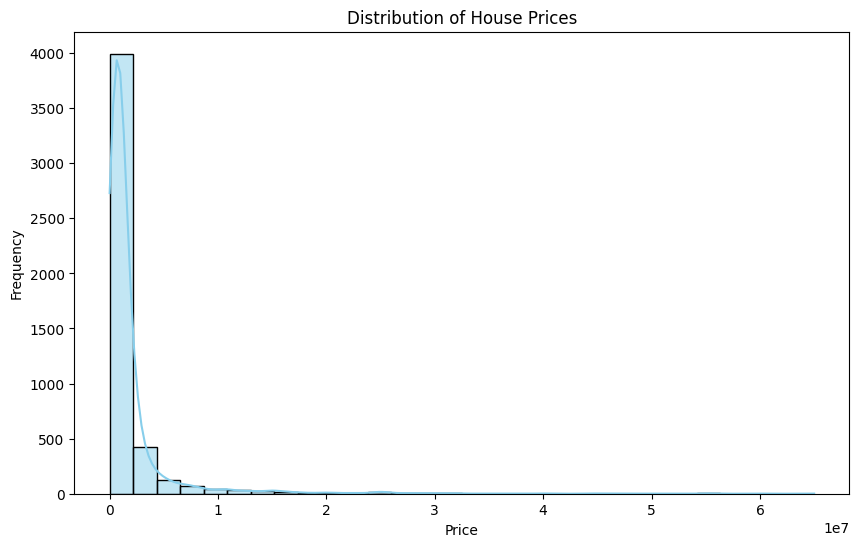

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_new['PRICE'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<div style="text-align:center; background-color:royalblue; color:wheat; font-size:25px; padding:20px;">
    <strong>Analysis 2: Property Types</strong>
</div>


### Explore the distribution of different property types.

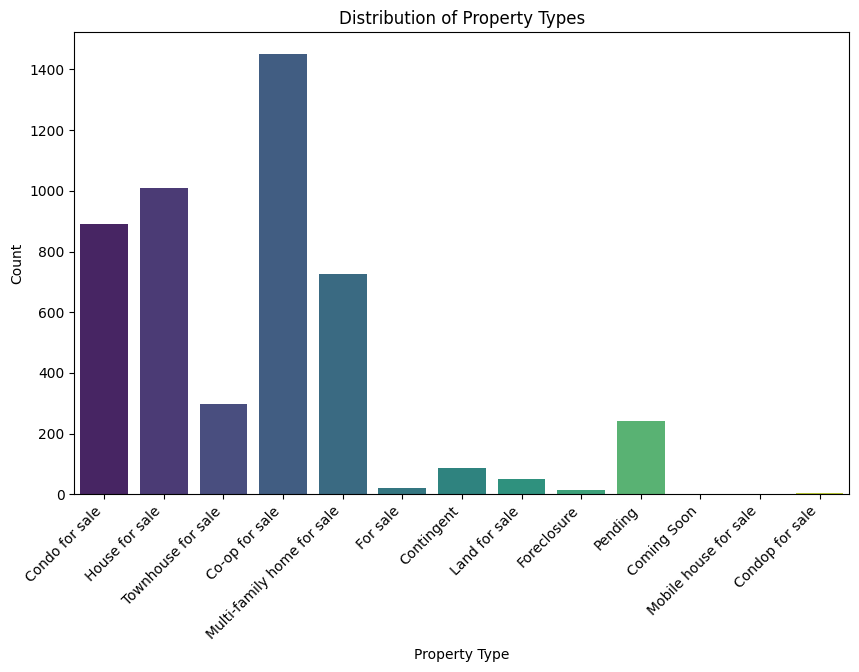

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TYPE', data=df_new, palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
